# 한신대학교 e-비즈니스학과 201646006 이성범 PD학기제 과제

In [ ]:
from sklearn.svm import SVC # 분류를 위한 서포트 벡터 머신
from sklearn.svm import SVR # 회귀 예측을 위한 서포트 벡터 머신

In [ ]:
# 그래프를 그리기 위한 함수
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.datasets import make_blobs, make_moons, make_regression

# 출처: https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
def SVM_plot(model, X, y, title='SVM plot'):
  model.fit(X, y)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

  # plot the decision function
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model.decision_function(xy).reshape(XX.shape)

  # plot decision boundary and margins
  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
  # plot support vectors
  ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
  ax.set_title(title)
  plt.show()

# SVM 이란?

SVM, Support Vector Machine은 회귀와 분류가 모두 가능한 딥러닝이 나오기 전까지 최고의 성능을 보였던 머신러닝 알고리즘이다. 

SVM은 데이터를 분류할 수 있는 최적의 결정 경계를 찾는 방법이기 때문에 사실 회귀보다는 분류에 더 높은 성능을 보여준다.

그렇다면 최적의 결정 경계는 어떻게 찾을까? 우선 결정 경계와 가까이 있는 Support Vector라 불리는 데이터 포인트들을 찾고 그 포인트를 기준으로 최대의 Margin을 찾는다. 여기서 Margin은 결정 경계와 서포트 벡터 사이의 거리를 의미한다.

밑에 나타난 그래프와 같이 점선으로 표현되는 Support Vector들의 선을 기준으로 하나의 선으로 표현되는 결정 경계를 찾는다. 여기서 선과 점선 간의 거리를 아까 설명한 Margin이라고 한다. 이렇듯 SVM은 다른 데이터 라벨 데이터인 Support Vector 간의 최대 Margin을 갖는 선을 찾는 알고리즘이라고 할 수 있다.

그런데 현실에 데이터가 밑의 그래프 처럼 하나의 직선으로 분류를 모두 할 수는 없을 것이다. 현실의 데이터는 곡선을 활용한 분류가 더 현실성이 있으며 성능 또한 높을 것이다.

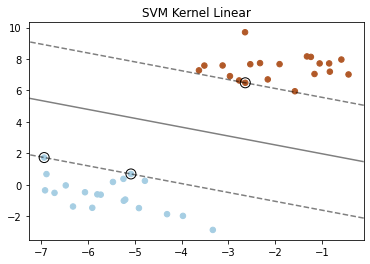

In [ ]:
X, y = make_blobs(n_samples=40, centers=2, random_state=22)

model = SVC(kernel='linear', C=100)

SVM_plot(model, X, y, title = 'SVM Kernel Linear')

실제 현실의 데이터를 선형을 활용하여 분류한다면 밑의 그래프와 같이 제대로 분류를 진행할 수 없을 것이다.

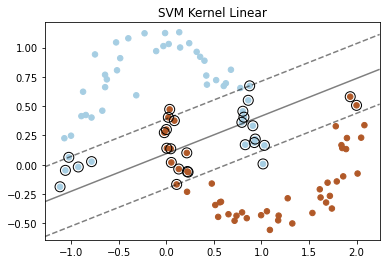

In [ ]:
X, y = make_moons(noise=0.1, random_state= 22)

model = SVC(kernel='linear', C=100)

SVM_plot(model, X, y, title = 'SVM Kernel Linear')

그래서 SVM은 선형으로 분류돠지는 못하는 데이터를 분류하기 위해서 다양한 kernel을 제공해준다.

SVM에서 제공해주는 kernel 은 'linear', 'rbf', 'poly', 'sigmoid'가 있으며 여기서 중요한 kernel은 'linear', 'rbf'이다. rbf는 Radial Bias Function으로 가우시안 분포를 활용하여 데이터를 분류하는 방식이다. 간단하게 설명하자면 저차원의 데이터를 무한의 차원으로 바꿔서 데이터를 분류할 수 있게 만드는 방식이다. 저차원의 데이터를 무한의 차원으로 변경함으로써 분류가 가능하게 만들어주는 것이다. 

SVM의 주요 파라미터는 C, gamma가 존재한다. C와 gamma는 하이퍼 파리미터로써 데이터에 따라 다르게 설정해줘야 한다. 따라서 그리드 서치, 랜덤 서치 등의 방법을 통해서 하이퍼 파라미터 튜닝을 진행해줘야 한다.

SVM의 주요 파라미터
- kernel = 'linear', 'rbf', 'poly', 'sigmoid'
- C =  클수록 하드마진(오류을 허용 안함, 과적합), 작을 수록 소프트 마진(오류를 허용함, 과소적합) -> 마진안에 존재하는 오류 값을 어느 정도 허용하느냐를 의미
- gamma =  높이면 학습 데이터에 의존하여 결정 경계를 그음(과적합), 낮추면 결정 경계를 직선에 가깝게 그음(과소적합)

아래의 그래프를 보면 rbf 커널을 활용하면 직선 및 곡선 등의 분류가 모두 가능하다는 것을 알 수 있지만 그래도 데이터의 특성에 맞는 커널을 활용함으로써 오버피팅 또는 언더피팅의 문제를 최소화 해야할 것이다. 

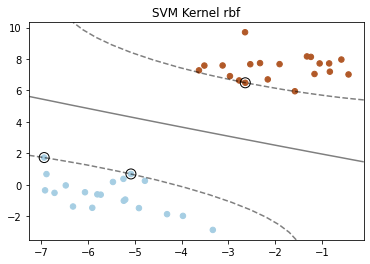

In [ ]:
X, y = make_blobs(n_samples=40, centers=2, random_state=22)

model = SVC(kernel='rbf', C=100, gamma = 0.01)

SVM_plot(model, X, y, title = 'SVM Kernel rbf')

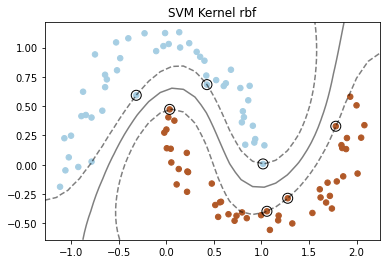

In [ ]:
X, y = make_moons(noise=0.1, random_state= 22)

model = SVC(kernel='rbf', C=100)

SVM_plot(model, X, y, title = 'SVM Kernel rbf')

SVM을 활용하여 선형 데이터를 예측한 것으로 예측 값과 실제 값을 그래프로 나타냈을 때 두 데이터가 직선을 이루는 것으로 보아 값을 제대로 예측했다는 것을 알 수 있다.

Text(0, 0.5, 'Ture')

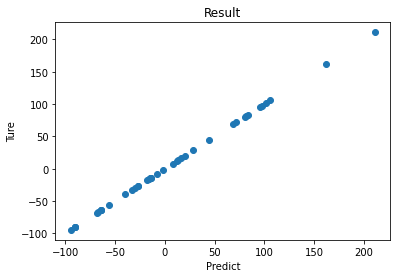

In [ ]:
X, y = make_regression(n_samples = 40, n_features = 4, random_state = 22)

model = SVR(kernel='linear', C=100)
model.fit(X, y)

plt.scatter(model.predict(X), y)
plt.title('Result')
plt.xlabel('Predict')
plt.ylabel('Ture')

# SVM 실습

SVM은 iris 데이터를 통해서 실습을 진행할 예정이다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris =  sns.load_dataset('iris')

X = iris.drop(labels = ['species'], axis=1) #학습할데이터
y = iris['species'] #타겟

SVM은 많은 차원과 큰 차원의 다항식, 복잡한 곡선 함수를 사용하기 때문에 조금만 스케일이 차이가 나도 훈련데이터에 과적합이 되기 때문에 무조건 데이터에 대해서 정규화를 해줘야 한다.

따라서 분산을 1, 평균을 0으로 만들어주는 표준화를 진행했다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify = y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel ='rbf', C = 5, gamma = 5)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

score = accuracy_score(y_pred, y_test)

print(f"Accuracy: {score:0.4f}")

Accuracy: 0.9333


테스트 데이터에 대하여 정확도가 0.9333을 보이며 분류가 제대로 되었다는 것을 알 수 있다.

# 참고자료

- 파이썬 머신러닝 완벽 가이드, 권철민
- 파이썬 딥러닝 파이토치, 이경택
- 핸즈온 머신러닝, 박해선
- 데이터 사이언스 스쿨, https://datascienceschool.net/
- 데이터 분석 대표 대학생 연합 동아리 Tobigs, http://www.datamarket.kr/
- DeepLearnig.AI Course 1 ~ 5, Andrew Ng, https://www.youtube.com/c/Deeplearningai/playlists
- 모두를 위한 딥러닝 시즌 2, https://deeplearningzerotoall.github.io/season2/
- https://ko.wikipedia.org/wiki/%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0
- http://hleecaster.com/ml-svm-concept/
- https://jfun.tistory.com/115